<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Criminology/blob/main/Total_data_mixed_effect_modeling_and_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make the dataframe

In [ ]:
! pip install stargazer
! pip install us

! pip install plotly
! pip install -U kaleido

In [ ]:
# General and Hate Crime dataset
import pandas as pd

df_general_crime = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/FBI_Crime_total.csv")
df_general_crime.drop("Area", axis=1, inplace=True)

df_hate_crime = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/FBT_Hate_Count.csv")
df_hate_crime.columns = ["Year", "State", "Hate_crime"]


# drop the index
df_general_crime.reset_index(drop=True, inplace=True)
df_hate_crime.reset_index(drop=True, inplace=True)

# merge the data
df_crime = pd.merge(df_general_crime, df_hate_crime, on=["Year", "State"], how="outer")

# Drop the additional State
df_crime = df_crime[df_crime["State"]!="HI"]
df_crime = df_crime[df_crime["State"]!="PR"]
df_crime = df_crime[df_crime["State"]!="FS"]
df_crime = df_crime[df_crime["State"]!="GM"]
df_crime = df_crime[df_crime["State"]!="NB"]

df_crime.loc[(df_crime["Year"] == 2000) & (df_crime["State"] == "CT"), "Property_crime"] = 99033

df_crime = df_crime.drop(df_crime.filter(like='100K').columns, axis=1)
df_crime.drop("Total_crime", axis=1, inplace=True)

# Hate Crime fillna
df_crime["Hate_crime"].fillna(0, inplace=True)

df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1000 non-null   int64  
 1   Population           1000 non-null   float64
 2   Violent_crime        1000 non-null   float64
 3   Murder               1000 non-null   float64
 4   Rape                 1000 non-null   float64
 5   Robbery              1000 non-null   float64
 6   Aggravated_assault   1000 non-null   float64
 7   Property_crime       1000 non-null   float64
 8   Burglary             1000 non-null   float64
 9   Larceny_theft        1000 non-null   float64
 10  Motor_vehicle_theft  1000 non-null   float64
 11  Rape_legacy          400 non-null    float64
 12  Rape_revised         400 non-null    float64
 13  State                1000 non-null   object 
 14  Hate_crime           1000 non-null   float64
dtypes: float64(13), int64(1), object(1)
me

In [ ]:
import pandas as pd

df_sun = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/Sun_Exposure.csv")
df_state = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/State_Level_ACS.csv")

temp = pd.merge(df_sun, df_state, on=["Year", "State"]) # No missing values

temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      1020 non-null   object 
 1   Year                       1020 non-null   int64  
 2   UV_Irradiance              1020 non-null   int64  
 3   Median age years           1020 non-null   float64
 4   Percent Male               1020 non-null   float64
 5   Percent White              1020 non-null   float64
 6   Percent BA or higher       1020 non-null   float64
 7   Percent unemployed         1020 non-null   float64
 8   Per capita income dollars  1020 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 79.7+ KB


In [ ]:
# Merge two

df_merged_1 = pd.merge(temp, df_crime, on=["State", "Year"])
df_merged_1.info()

df_merged_1[df_merged_1["Hate_crime"].isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      1000 non-null   object 
 1   Year                       1000 non-null   int64  
 2   UV_Irradiance              1000 non-null   int64  
 3   Median age years           1000 non-null   float64
 4   Percent Male               1000 non-null   float64
 5   Percent White              1000 non-null   float64
 6   Percent BA or higher       1000 non-null   float64
 7   Percent unemployed         1000 non-null   float64
 8   Per capita income dollars  1000 non-null   float64
 9   Population                 1000 non-null   float64
 10  Violent_crime              1000 non-null   float64
 11  Murder                     1000 non-null   float64
 12  Rape                       1000 non-null   float64
 13  Robbery                    1000 non-null   float6

,State,Year,UV_Irradiance,Median age years,Percent Male,Percent White,Percent BA or higher,Percent unemployed,Per capita income dollars,Population,...,Rape,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Rape_legacy,Rape_revised,Hate_crime


In [ ]:
# Air pollution
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/airqualitytrendsbycity2000-2022.csv", skiprows=3)
df = df.iloc[:-10, :]
df["CBSA"] = df["CBSA"].apply(pd.to_numeric)

df_zip = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/NBER_CBSA%20to%20FIPS.csv")
df_zip = df_zip[["cbsacode", "statename"]]

# drop the index
df.reset_index(drop=True, inplace=True)
df_zip.reset_index(drop=True, inplace=True)

df_merged = pd.merge(df_zip, df, left_on="cbsacode", right_on="CBSA").sort_values(by=["statename", "Pollutant"])
df_merged = df_merged.drop_duplicates(subset = ["statename", "Pollutant", "Trend Statistic"])

df_merged = df_merged[df_merged["Pollutant"] != "Pb"]
df_merged = df_merged[df_merged["Trend Statistic"] != "98th Percentile"]
df_merged.groupby("Pollutant")["Trend Statistic"].value_counts()

df_merged.drop(["cbsacode", "Core Based Statistical Area", "Core Based Statistical Area", "CBSA", 'Number of Trends Sites'], axis=1, inplace=True)

df_merged

df_long = pd.melt(df_merged, id_vars=['statename', 'Pollutant', 'Trend Statistic'],
                  var_name='Year', value_name='Value')

# State abbreviated name
import us
def state_name_to_abbreviation(state_name):
    state = us.states.lookup(state_name)
    if state:
        return state.abbr
    else:
        return state_name

df_long['State'] = df_long["statename"].apply(state_name_to_abbreviation)
df_long["State"] = df_long["State"].str.replace("District of Columbia", "DC")

df_long = df_long[["State", "Year", "Pollutant", "Value"]]

df_wide = pd.pivot_table(df_long, values='Value', index=['State', 'Year'], columns='Pollutant').reset_index()
df_wide.head()

df_air = df_wide
df_air["Year"] =  df_air["Year"].apply(pd.to_numeric)

# df_merged["statename"].value_counts() No South Dakota data

In [ ]:
df_total = pd.merge(df_merged_1, df_air, on = ["Year", "State"])
df_total.info()

set(df_merged_1["State"].unique()) - set(df_air["State"].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      980 non-null    object 
 1   Year                       980 non-null    int64  
 2   UV_Irradiance              980 non-null    int64  
 3   Median age years           980 non-null    float64
 4   Percent Male               980 non-null    float64
 5   Percent White              980 non-null    float64
 6   Percent BA or higher       980 non-null    float64
 7   Percent unemployed         980 non-null    float64
 8   Per capita income dollars  980 non-null    float64
 9   Population                 980 non-null    float64
 10  Violent_crime              980 non-null    float64
 11  Murder                     980 non-null    float64
 12  Rape                       980 non-null    float64
 13  Robbery                    980 non-null    float64

{'SD'}

In [ ]:
state_to_region = {
    'Northeast': ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'DC'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'South': ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
}

# Function to map state to region
def map_state_to_region(state):
    for region, states in state_to_region.items():
        if state in states:
            return region
    return 'Unknown'  # Return 'Unknown' if the state is not found in the mapping

# Create a new column 'Region' based on the 'State' column
df_total['Region'] = df_total['State'].apply(map_state_to_region)

In [ ]:
df_total.columns = df_total.columns.str.replace(" ","_").str.replace(".", "")

df_total["Violent_crime_per_100K"] = (df_total["Violent_crime"] / df_total["Population"]) * 100 * 1000
df_total["Property_crime_per_100K"] = (df_total["Property_crime"] / df_total["Population"]) * 100 * 1000
df_total["Hate_crime_per_100K"] = (df_total["Hate_crime"] / df_total["Population"]) * 100 * 1000

<ipython-input-29-a51e0fd69501>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_total.columns = df_total.columns.str.replace(" ","_").str.replace(".", "")


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      980 non-null    object 
 1   Year                       980 non-null    int64  
 2   UV_Irradiance              980 non-null    int64  
 3   Median_age_years           980 non-null    float64
 4   Percent_Male               980 non-null    float64
 5   Percent_White              980 non-null    float64
 6   Percent_BA_or_higher       980 non-null    float64
 7   Percent_unemployed         980 non-null    float64
 8   Per_capita_income_dollars  980 non-null    float64
 9   Population                 980 non-null    float64
 10  Violent_crime              980 non-null    float64
 11  Murder                     980 non-null    float64
 12  Rape                       980 non-null    float64
 13  Robbery                    980 non-null    float64

# Modeling

In [ ]:
df_total.columns

Index(['State', 'Year', 'UV_Irradiance', 'Median_age_years', 'Percent_Male',
       'Percent_White', 'Percent_BA_or_higher', 'Percent_unemployed',
       'Per_capita_income_dollars', 'Population', 'Violent_crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft', 'Rape_legacy', 'Rape_revised',
       'Hate_crime', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'Region',
       'Violent_crime_per_100K', 'Property_crime_per_100K',
       'Hate_crime_per_100K'],
      dtype='object')

In [ ]:
df_total.to_csv("df_total.csv", index=False)

In [ ]:
# Base Linaer Model

import statsmodels.api as sm
import statsmodels.formula.api as smf
crime_types = ['Violent', 'Property', 'Hate']

independent_variables = ['Year', 'Median_age_years', 'Percent_Male', 'Percent_White', 'Percent_BA_or_higher',
                          'Percent_unemployed', 'Per_capita_income_dollars', 'PM10', 'PM25', 'NO2', 'SO2', 'UV_Irradiance']

results = {}

for crime_type in crime_types:
    formula = f"{crime_type}_crime_per_100K ~ {' + '.join(independent_variables)}"
    model = smf.ols(formula=formula, data=df_total)
    results[crime_type] = model.fit()

# Access the results for each crime type
result_violent = results['Violent']
result_property = results['Property']
result_hate = results['Hate']


In [ ]:
from stargazer.stargazer import Stargazer

stargazer = Stargazer([result_violent, result_property, result_hate])
stargazer.title("Base Model for Violent, Property, and Hate Crimes per 100K Population")
stargazer.custom_columns(['Violent Crimes', 'Property Crimes', 'Hate Crimes'])
stargazer.significant_digits(2)

stargazer

#stargazer.render_html("Base Linear Model.html")

In [ ]:
df_total.drop(["Rape_legacy", "Rape_revised", "CO", "O3"], axis=1, inplace=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      980 non-null    object 
 1   Year                       980 non-null    int64  
 2   UV_Irradiance              980 non-null    int64  
 3   Median_age_years           980 non-null    float64
 4   Percent_Male               980 non-null    float64
 5   Percent_White              980 non-null    float64
 6   Percent_BA_or_higher       980 non-null    float64
 7   Percent_unemployed         980 non-null    float64
 8   Per_capita_income_dollars  980 non-null    float64
 9   Population                 980 non-null    float64
 10  Violent_crime              980 non-null    float64
 11  Murder                     980 non-null    float64
 12  Rape                       980 non-null    float64
 13  Robbery                    980 non-null    float64

In [ ]:
import statsmodels.formula.api as smf

df_model_no_missing = df_total.dropna()

independent_variables = ['Year', 'Median_age_years', 'Percent_Male', 'Percent_White', 'Percent_BA_or_higher',
                          'Percent_unemployed', 'Per_capita_income_dollars', 'PM10', 'PM25', 'NO2', 'SO2', 'UV_Irradiance']

formula_violent = "Violent_crime_per_100K ~ " + " + ".join(independent_variables)
formula_proprty = "Property_crime_per_100K ~ " + " + ".join(independent_variables)
formula_hate = "Hate_crime_per_100K ~ " + " + ".join(independent_variables)

mixedlm_model_violent = smf.mixedlm(formula_violent, data=df_model_no_missing, groups="Region")
mixedlm_model_property = smf.mixedlm(formula_proprty, data=df_model_no_missing, groups="Region")
mixedlm_model_hate = smf.mixedlm(formula_hate, data=df_model_no_missing, groups="Region")

result_violent = mixedlm_model_violent.fit()
result_property = mixedlm_model_property.fit()
result_hate = mixedlm_model_hate.fit()

print(result_violent.summary(), "\n")
print(result_property.summary(), "\n")
print(result_hate.summary())

with pd.ExcelWriter('mixed_region_per_100K.xlsx') as writer:
    result_violent.summary().tables[1].to_excel(writer, sheet_name='Violent Crime')
    result_property.summary().tables[1].to_excel(writer, sheet_name='Property Crime')
    result_hate.summary().tables[1].to_excel(writer, sheet_name='Hate Crime')


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                    Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    Violent_crime_per_100K
No. Observations:    440        Method:                REML                  
No. Groups:          4          Scale:                 7154.4393             
Min. group size:     60         Log-Likelihood:        -2572.2434            
Max. group size:     160        Converged:             Yes                   
Mean group size:     110.0                                                   
-----------------------------------------------------------------------------
                            Coef.   Std.Err.   z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------------------
Intercept                 27081.149 3120.671  8.678 0.000 20964.747 33197.552
Year                        -11.419    1.597 -7.152 0.000   -14.549    -8.290
Median_age_years             -0.260    3.945 -0.066 0.947    -7.993     7.473
Percen

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.genmod import families

independent_variables = ['Year', 'Median_age_years', 'Percent_Male', 'Percent_White', 'Percent_BA_or_higher',
                          'Percent_unemployed', 'Per_capita_income_dollars', 'PM10', 'PM25', 'NO2', 'SO2', 'UV_Irradiance']

formula_violent = "Violent_crime_per_100K ~ " + " + ".join(independent_variables)
formula_proprty = "Property_crime_per_100K ~ " + " + ".join(independent_variables)
formula_hate = "Hate_crime_per_100K ~ " + " + ".join(independent_variables)

mixedlm_model_violent = smf.mixedlm(formula_violent, data=df_model_no_missing, groups="Region",  family=sm.families.Poisson())
mixedlm_model_property = smf.mixedlm(formula_proprty, data=df_model_no_missing, groups="Region",  family=sm.families.Poisson())
mixedlm_model_hate = smf.mixedlm(formula_hate, data=df_model_no_missing, groups="Region",  family=sm.families.Poisson())

result_violent = mixedlm_model_violent.fit()
result_property = mixedlm_model_property.fit()
result_hate = mixedlm_model_hate.fit()

print(result_violent.summary(), "\n")
print(result_property.summary(), "\n")
print(result_hate.summary())

with pd.ExcelWriter('mixed_region_per_100K.xlsx') as writer:
    result_violent.summary().tables[1].to_excel(writer, sheet_name='Violent Crime')
    result_property.summary().tables[1].to_excel(writer, sheet_name='Property Crime')
    result_hate.summary().tables[1].to_excel(writer, sheet_name='Hate Crime')


AttributeError: ignored

# Graph

## Geoheatmap across years

In [ ]:
df_total["General_crime_per_100K"] = df_total["Violent_crime_per_100K"] + df_total["Property_crime_per_100K"]

In [ ]:
df_total.columns

Index(['State', 'Year', 'UV_Irradiance', 'Median_age_years', 'Percent_Male',
       'Percent_White', 'Percent_BA_or_higher', 'Percent_unemployed',
       'Per_capita_income_dollars', 'Population', 'Violent_crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft', 'Rape_legacy', 'Rape_revised',
       'Hate_crime', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'Region',
       'Violent_crime_per_100K', 'Property_crime_per_100K',
       'Hate_crime_per_100K', 'General_crime_per_100K'],
      dtype='object')

In [ ]:
import plotly.express as px
import kaleido

variable = "Hate_crime_per_100K"
# color = [Brwnyl, Pinkyl, Darkmint, Purpor]
title = pd.Series([variable]).str.replace("_", " ").str.title().iloc[0]

df_total_temp = df_total.groupby("State")[variable].mean().reset_index()
color_range = [df_total_temp.describe().loc["25%"][variable],
               df_total_temp.describe().loc["75%"][variable]]

fig = px.choropleth(df_total_temp,
                    locations="State",
                    locationmode='USA-states',
                    color=variable,
                    range_color = color_range,
                    color_continuous_scale="Purpor",
                    scope='usa')
                    #title = f"{title}")

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    paper_bgcolor="white",
    title=dict(text=f"{title} across 2000 ~ 2019", font=dict(size=40), automargin=True, yref='paper')
    )


fig.write_image(f"{title}.png")

fig.show()

## Corr Heatmap

In [ ]:
df_total.columns

df_corr = df_total[['Violent_crime_per_100K', 'Property_crime_per_100K', 'Hate_crime_per_100K',
    'UV_Irradiance', 'NO2','PM10', 'PM25', 'SO2',
          'Median_age_years', 'Percent_Male',
       'Percent_White', 'Percent_BA_or_higher', 'Percent_unemployed',
       'Per_capita_income_dollars']]

df_corr.columns = [["Violent Crime", "Property Crime", "Hate Crime",
                    "Sun (UV Irradiance)", "$NO_{2}$", "$PM_{10}$", "$PM_{25}$", "$SO_{2}$",
                    "Median Age", "Male Percent", "White Percent", "Educational Attainment", "Unemployed Percent", "Per Capita Income"]]

df_corr_matrix = df_corr.corr()

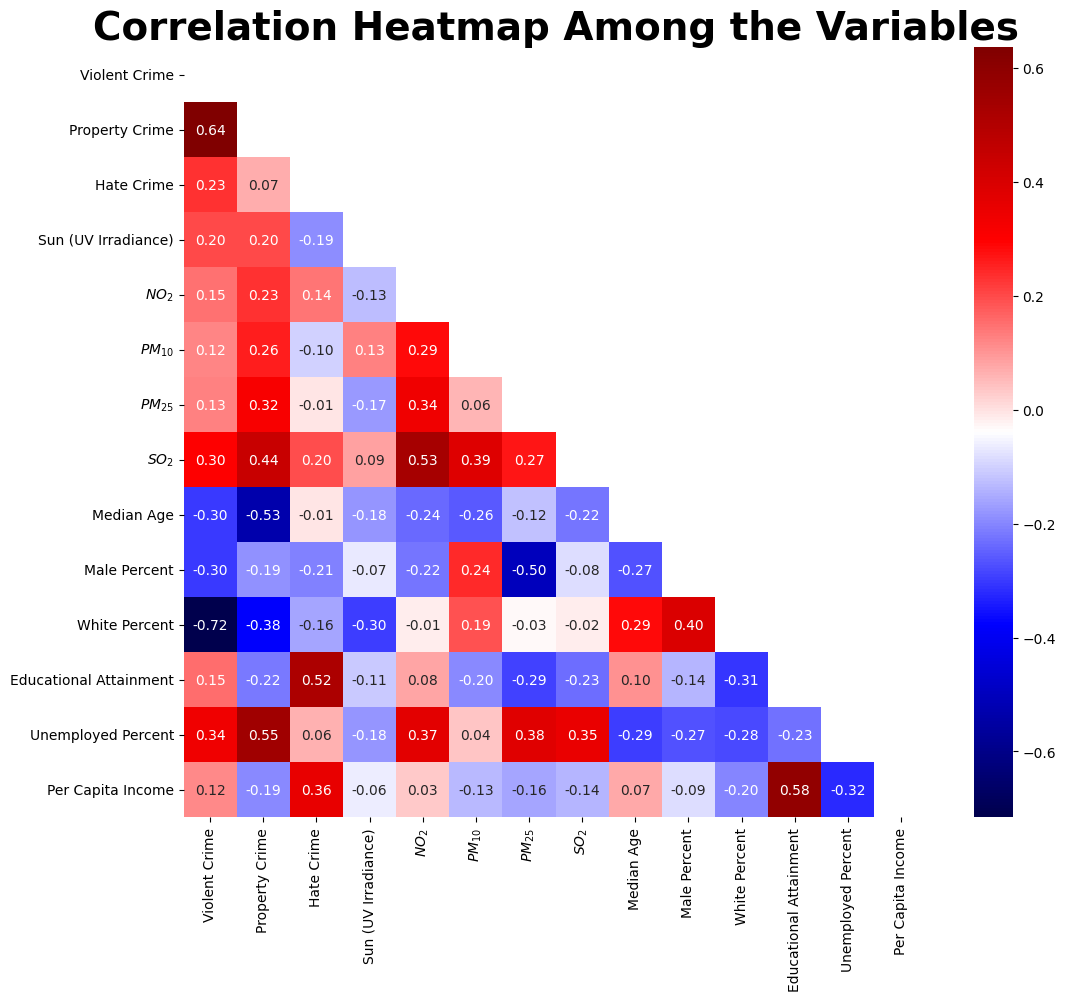

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(df_corr_matrix))

plt.figure(figsize=(12, 10))

sns.heatmap(df_corr_matrix,
            mask=mask,
            annot=True, fmt=".2f", cmap="seismic")

plt.title("Correlation Heatmap Among the Variables", fontsize=28, fontweight='bold')

plt.savefig("correlation_heatmap.png")

plt.xlabel("")
plt.ylabel("")
plt.show()


## Scatter Plot

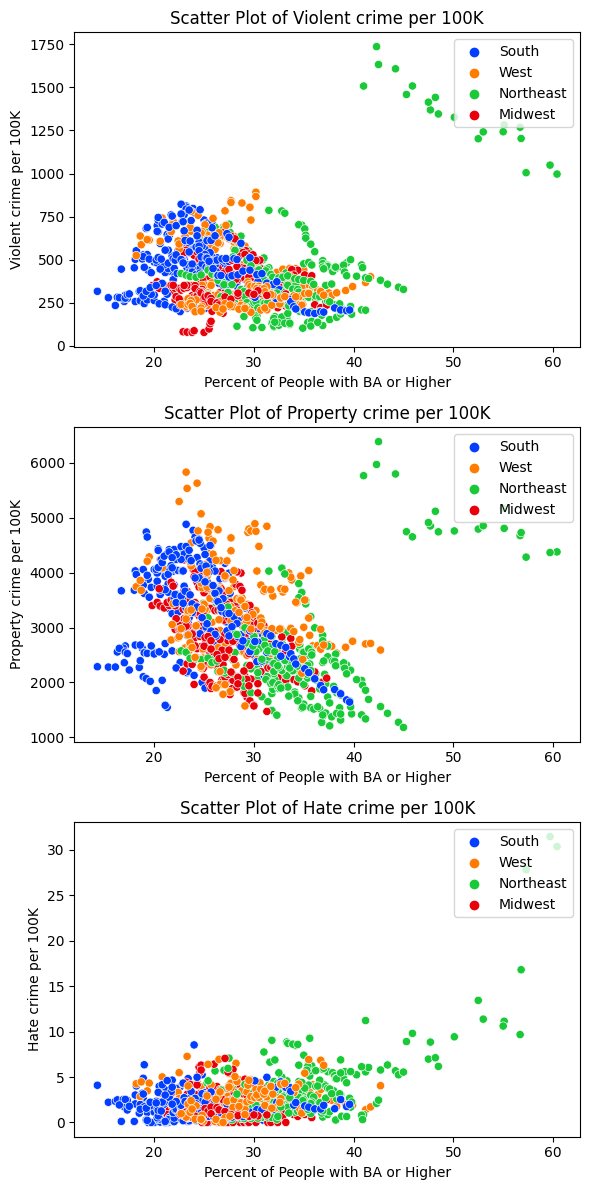

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# List of crime types
crime_types = ['Violent_crime_per_100K', 'Property_crime_per_100K', 'Hate_crime_per_100K']

# Create subplots for each crime type
for i, crime_type in enumerate(crime_types):
    sns.scatterplot(data=df_total, x="Percent_BA_or_higher", y=crime_type, hue="Region", ax=axes[i])

    crime_type_text = crime_type.replace("_", " ")
    axes[i].set_title(f"Scatter Plot of {crime_type_text}")
    axes[i].set_xlabel("Percent of People with BA or Higher")
    axes[i].set_ylabel(crime_type_text)
    axes[i].legend(loc='upper right')


# Adjust layout
plt.tight_layout()
plt.savefig('scatter_plots.png')

plt.show()


## Lineplot for Trend

In [ ]:
df_total.columns

Index(['State', 'Year', 'UV_Irradiance', 'Median_age_years', 'Percent_Male',
       'Percent_White', 'Percent_BA_or_higher', 'Percent_unemployed',
       'Per_capita_income_dollars', 'Population', 'Violent_crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft', 'Rape_legacy', 'Rape_revised',
       'Hate_crime', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'Region',
       'Violent_crime_per_100K', 'Property_crime_per_100K',
       'Hate_crime_per_100K', 'General_crime_per_100K'],
      dtype='object')

In [ ]:
temp = df_total[["State", "Year", "UV_Irradiance", "PM10", "PM25", "NO2", "SO2", "General_crime_per_100K", "Hate_crime_per_100K"]]

temp = temp.dropna()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(temp.iloc[:, 2:])
scaled_df = pd.DataFrame(scaled_values, columns=temp.columns.tolist()[2:])

temp = temp.reset_index(drop=True)
scaled_df = scaled_df.reset_index(drop=True)

result_df = pd.concat([temp[["State", "Year"]], scaled_df], axis=1)
result_df_long = pd.melt(result_df, id_vars=["State","Year"], var_name="Variable", value_name="Scaled_Value")

result_df_long["Variable"].value_counts()

UV_Irradiance             440
PM10                      440
PM25                      440
NO2                       440
SO2                       440
General_crime_per_100K    440
Hate_crime_per_100K       440
Name: Variable, dtype: int64

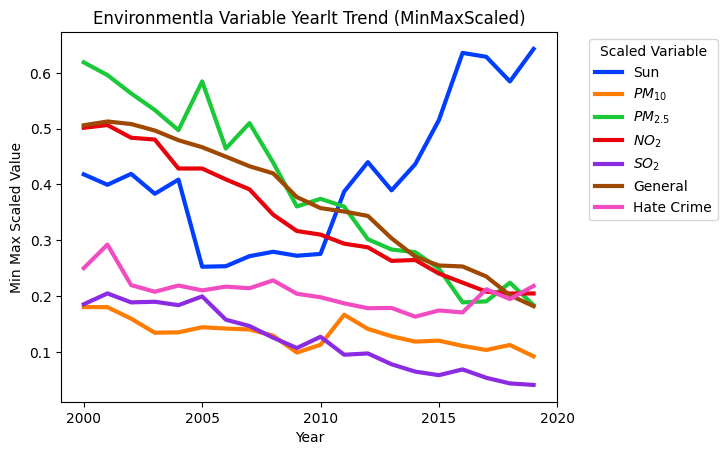

In [ ]:
############### Graph ###############

import seaborn as sns
import matplotlib.pyplot as plt
#palettes = ['colorblind', 'deep', 'muted', 'bright', 'pastel', 'dark']
sns.set_palette('bright')

sns.lineplot(result_df_long, x="Year", y="Scaled_Value",
             hue="Variable",
             #style="Variable",
             linewidth=3, errorbar=None)

plt.title("Environmentla Variable Yearlt Trend (MinMaxScaled)")
plt.legend(
    title="Scaled Variable",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    labels=["Sun", "$PM_{10}$", "$PM_{2.5}$", "$NO_{2}$", "$SO_{2}$", "General", "Hate Crime"]
)

plt.xticks(np.arange(2000, 2021, 5))
plt.ylabel("Min Max Scaled Value")

plt.savefig("environmental_variable_trend.png", bbox_inches="tight")

plt.show()

# Hate Crime File Preprocessing

In [ ]:
import pandas as pd

df_hate = pd.read_csv("/content/FBI_HateCrime.csv")
df_hate = df_hate[(df_hate["data_year"]>=2000) &  (df_hate["data_year"]<= 2019)]

df_hate_summary = df_hate.groupby(["data_year", "state_abbr"])["incident_id"].count().reset_index()

df_hate_summary.columns = ["Year", "State", "Hate_crime"]
df_hate_summary.to_csv("FBI_Hate_Crime_0019.csv", index=False)